# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
%matplotlib inline

import nltk
import string
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Importing Data

In [2]:
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [4]:
df.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


# Exploratory Data Analysis

In [5]:
df.groupby('category').describe()

text                                                            \
              count unique                                                top   
category                                                                        
business        510    503  economy  strong  in election year uk businesse...   
entertainment   386    369  ocean s twelve raids box office ocean s twelve...   
politics        417    403  super union  merger plan touted two of britain...   
sport           511    504  hantuchova in dubai last eight daniela hantuch...   
tech            401    347  california sets fines for spyware the makers o...   

                    
              freq  
category            
business         2  
entertainment    2  
politics         2  
sport            2  
tech             2

#### Let's make a new column to detect how long the text messages are

In [6]:
df['Length'] = df['text'].apply(len)
df.head()

,category,text,Length
0,tech,tv future in the hands of viewers with home th...,4333
1,business,worldcom boss left books alone former worldc...,1842
2,sport,tigers wary of farrell gamble leicester say ...,1342
3,sport,yeading face newcastle in fa cup premiership s...,2176
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579


<AxesSubplot:ylabel='Frequency'>

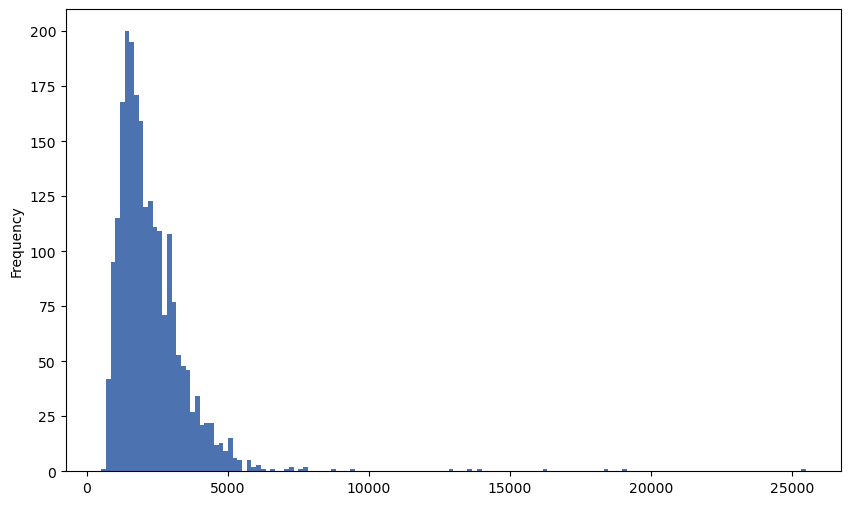

In [11]:
plt.figure(figsize=(10,6))
df['Length'].plot.hist(bins = 150)

In [12]:
df['Length'].describe()

count     2225.00000
mean      2262.93618
std       1364.10253
min        501.00000
25%       1446.00000
50%       1965.00000
75%       2802.00000
max      25483.00000
Name: Length, dtype: float64

### One of the text has 501 character, let's use masking to find this message

In [13]:
df[df['Length'] == 501]

,category,text,Length
323,politics,blunkett hints at election call ex-home secret...,501


# Text Cleaning

Let's clean the text for the messages in our dataset with NLP

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
mess = ['''For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..''']

In [16]:
no_punc = [char for char in mess if char not in string.punctuation]
print(no_punc)

["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."]


In [17]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
## EXample
x = mess[0].lower().split()
y = stopwords.words('english')

for i in y:
    if i in x:
        x.remove(i)
print(x)

['love', 'start', 'attraction.i', 'should', 'feel', 'need', 'every', 'time', 'around', 'me.she', 'should', 'the', 'first', 'thing', 'comes', 'thoughts.i', 'would', 'start', 'the', 'day', 'end', 'with', 'her.she', 'should', 'be', 'every', 'time', 'i', 'dream.love', 'be', 'my', 'every', 'breath', 'her', 'name.my', 'life', 'should', 'happen', 'around', 'her.my', 'life', 'will', 'be', 'named', 'her.i', 'would', 'cry', 'for', 'her.will', 'give', 'my', 'happiness', 'and', 'take', 'all', 'her', 'sorrows.i', 'will', 'be', 'ready', 'to', 'fight', 'with', 'anyone', 'for', 'her.i', 'will', 'be', 'in', 'love', 'when', 'i', 'will', 'be', 'the', 'craziest', 'things', 'for', 'her.love', 'will', 'be', 'when', 'i', 'to', 'proove', 'anyone', 'that', 'my', 'girl', 'the', 'beautiful', 'lady', 'the', 'whole', 'planet.i', 'will', 'always', 'be', 'singing', 'praises', 'for', 'her.love', 'will', 'be', 'when', 'i', 'start', 'making', 'chicken', 'curry', 'and', 'end', 'up', 'makiing', 'sambar.life', 'will', 'be

#### Let's create the function to remove all punctuation, remove all stopwords and returns a list of the cleaned text 

In [20]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    
    # Check the characters to see if they are in punctuation
    no_punc = [char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string
    no_punc_join = ''.join(no_punc)
    
    # Now remove any stopwords
    no_punc_join_removed = [word for word in no_punc_join.split() if word.lower() not in stopwords.words('english')]
    
    return no_punc_join_removed

#### Check to make sure its working

In [21]:
df['text'].apply(text_process)

0       [tv, future, hands, viewers, home, theatre, sy...
1       [worldcom, boss, left, books, alone, former, w...
2       [tigers, wary, farrell, gamble, leicester, say...
3       [yeading, face, newcastle, fa, cup, premiershi...
4       [ocean, twelve, raids, box, office, ocean, twe...
                              ...                        
2220    [cars, pull, us, retail, figures, us, retail, ...
2221    [kilroy, unveils, immigration, policy, exchats...
2222    [rem, announce, new, glasgow, concert, us, ban...
2223    [political, squabbles, snowball, become, commo...
2224    [souness, delight, euro, progress, boss, graem...
Name: text, Length: 2225, dtype: object

# Vectorization

Now we have the messages as lists and we need to convert each of those messages into a vector that SciKit Learn's algorithm models can work with.

In [22]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000022E5C370550>)

In [23]:
bow_transformer.vocabulary_

{'tv': 30060,
 'future': 12857,
 'hands': 13983,
 'viewers': 31069,
 'home': 14680,
 'theatre': 29138,
 'systems': 28665,
 'plasma': 22278,
 'highdefinition': 14460,
 'tvs': 30067,
 'digital': 9404,
 'video': 31050,
 'recorders': 23995,
 'moving': 19652,
 'living': 17740,
 'room': 25155,
 'way': 31461,
 'people': 21852,
 'watch': 31427,
 'radically': 23594,
 'different': 9388,
 'five': 12145,
 'years': 32218,
 'time': 29381,
 'according': 2292,
 'expert': 11405,
 'panel': 21469,
 'gathered': 13019,
 'annual': 3230,
 'consumer': 7759,
 'electronics': 10546,
 'show': 26554,
 'las': 17169,
 'vegas': 30924,
 'discuss': 9579,
 'new': 20152,
 'technologies': 28915,
 'impact': 15225,
 'one': 20842,
 'favourite': 11774,
 'pastimes': 21645,
 'us': 30743,
 'leading': 17279,
 'trend': 29828,
 'programmes': 23088,
 'content': 7793,
 'delivered': 8994,
 'via': 31005,
 'networks': 20131,
 'cable': 5898,
 'satellite': 25567,
 'telecoms': 28952,
 'companies': 7378,
 'broadband': 5541,
 'service': 2619

In [24]:
#Print total number of vocab words
print(len(bow_transformer.vocabulary_))

32955


####  Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer

In [25]:
message4 = df['text'][3]
print(message4)

yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round.  the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading  who beat slough in the second round. conference side exeter city  who knocked out doncaster on saturday  will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united  who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park.  a number of premiership teams face difficult away games against championship sides on the weekend of 8/9 january. third-placed everton visit plymouth  liverpool travel to burnley  crystal palace go to sunderland  fulham face carling cup semi-finalists watford  bolton mee

#### Now let's see its vector representation

In [28]:
bow4 = bow_transformer.transform([message4])
#print(bow4)
print(bow4.shape)

(1, 32955)


#### Now let's transform the entire DataFrame of messages and create sparse matrix

In [29]:
messages_bow = bow_transformer.transform(df['text'])
messages_bow

<2225x32955 sparse matrix of type '<class 'numpy.int64'>'
	with 351196 stored elements in Compressed Sparse Row format>

In [30]:
print("Shape of Sparse Matrix: ", messages_bow.shape)
print("Amount of Non-Zero occurances: ", messages_bow.nnz)

Shape of Sparse Matrix:  (2225, 32955)
Amount of Non-Zero occurances:  351196


In [31]:
# sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
# print('sparsity: {}'.format((sparsity)))

sparsity: 0.47895887991626307


# TF-IDF

Now let's compute term weighting and do normalisation with TF-IDF


In [32]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_transform = tfidf_transformer.transform(messages_bow)
print(tfidf_transform)

  (0, 32269)	0.037935187764147046
  (0, 32236)	0.02502710456830842
  (0, 32218)	0.033864397027638396
  (0, 32028)	0.03710594759218775
  (0, 31992)	0.02100667673046039
  (0, 31813)	0.03664812000393144
  (0, 31808)	0.09589102026311293
  (0, 31569)	0.01883413134132603
  (0, 31511)	0.02678740422843605
  (0, 31461)	0.03734874333099458
  (0, 31427)	0.136138533411439
  (0, 31347)	0.14814741780153445
  (0, 31069)	0.10864793656258968
  (0, 31068)	0.04861588905896267
  (0, 31050)	0.05626926860855512
  (0, 31020)	0.03695029588627538
  (0, 31005)	0.03145737594843765
  (0, 30924)	0.04141750597288596
  (0, 30764)	0.021827078427897984
  (0, 30743)	0.10694223933162789
  (0, 30718)	0.052098207267701584
  (0, 30204)	0.03992163146528098
  (0, 30183)	0.05650239402397808
  (0, 30069)	0.06175011629580761
  (0, 30067)	0.09245260244321195
  :	:
  (2224, 9895)	0.12109971024430365
  (2224, 8984)	0.11442471146497192
  (2224, 8820)	0.056428957311948434
  (2224, 8637)	0.09213091532167896
  (2224, 8460)	0.129959324

# Split dataset

In [33]:
msg_train, msg_test, label_train, label_test = train_test_split(df['text'],df['category'], test_size=0.2,shuffle=True)
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

1780 445 2225


# Creating Data Pipeline


Let's run our model again and then predict the test set. We will create and use a pipeline for this purpose

# For SVM

In [34]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', SVC()) #train on TF-IDF vectors w/SVM
])

In [35]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022E5C370550>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [36]:
label_test

977        sport
1877    business
1226       sport
195     politics
748     politics
          ...   
2059    politics
941         tech
12      business
388     business
1902    politics
Name: category, Length: 445, dtype: object

In [37]:
predictions = pipeline.predict(msg_test)
print(predictions)

['sport' 'business' 'sport' 'politics' 'politics' 'business' 'sport'
 'sport' 'politics' 'tech' 'business' 'tech' 'sport' 'politics' 'business'
 'tech' 'entertainment' 'politics' 'politics' 'politics' 'sport' 'sport'
 'business' 'business' 'business' 'politics' 'politics' 'entertainment'
 'business' 'politics' 'politics' 'politics' 'tech' 'tech' 'sport' 'sport'
 'politics' 'sport' 'sport' 'sport' 'politics' 'politics' 'business'
 'business' 'sport' 'politics' 'politics' 'entertainment' 'business'
 'business' 'business' 'tech' 'business' 'tech' 'sport' 'tech' 'tech'
 'sport' 'entertainment' 'business' 'sport' 'sport' 'tech' 'sport'
 'politics' 'business' 'entertainment' 'sport' 'politics' 'tech' 'sport'
 'entertainment' 'business' 'entertainment' 'sport' 'tech' 'sport'
 'politics' 'politics' 'politics' 'tech' 'politics' 'sport' 'politics'
 'tech' 'politics' 'sport' 'sport' 'sport' 'politics' 'politics' 'tech'
 'entertainment' 'entertainment' 'sport' 'tech' 'politics' 'entertainment'
 's

# Metric accuracy

In [55]:
print("Accuracy:",metrics.accuracy_score(predictions,label_test))

Accuracy: 0.9707865168539326


# Classification report

In [56]:
print(classification_report(predictions, label_test))

               precision    recall  f1-score   support

     business       0.99      0.92      0.95        98
entertainment       0.97      0.99      0.98        70
     politics       0.93      0.99      0.96        82
        sport       1.00      1.00      1.00       120
         tech       0.95      0.96      0.95        75

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



# Confusion Matrix

Confusion Matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

Text(0.5, 427.9555555555555, 'Predicted label')

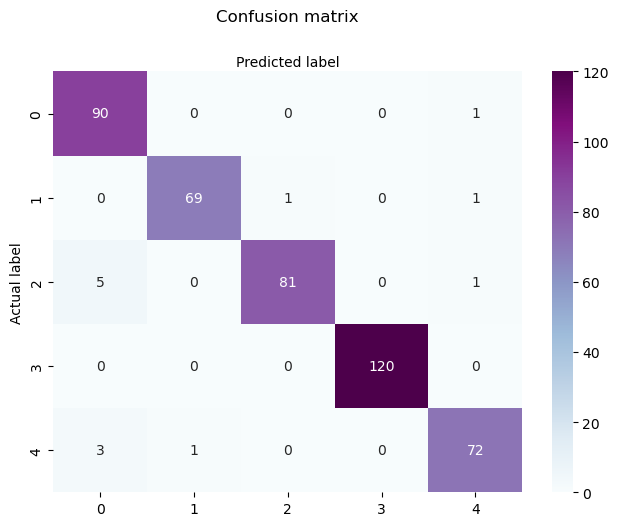

In [57]:
cm = confusion_matrix(label_test,predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
set(df['category'])

{'business', 'entertainment', 'politics', 'sport', 'tech'}

# for Random Forest

In [59]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()) #train on TF-IDF vectors w/
])

In [53]:
pipeline2.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022E5C370550>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [54]:
predictions2 = pipeline2.predict(msg_test)
print(predictions2)

['sport' 'business' 'sport' 'entertainment' 'politics' 'business' 'sport'
 'sport' 'politics' 'tech' 'business' 'tech' 'sport' 'politics' 'business'
 'tech' 'entertainment' 'politics' 'politics' 'politics' 'sport' 'sport'
 'business' 'business' 'business' 'politics' 'politics' 'entertainment'
 'business' 'politics' 'politics' 'politics' 'tech' 'tech' 'sport' 'sport'
 'politics' 'sport' 'sport' 'sport' 'politics' 'politics' 'business'
 'business' 'sport' 'politics' 'politics' 'entertainment' 'business'
 'business' 'business' 'tech' 'business' 'tech' 'sport' 'tech' 'tech'
 'sport' 'entertainment' 'business' 'sport' 'sport' 'tech' 'sport'
 'politics' 'business' 'entertainment' 'sport' 'politics' 'sport' 'sport'
 'entertainment' 'business' 'entertainment' 'sport' 'tech' 'sport'
 'politics' 'politics' 'politics' 'sport' 'politics' 'sport' 'politics'
 'tech' 'politics' 'sport' 'sport' 'sport' 'politics' 'politics'
 'entertainment' 'entertainment' 'entertainment' 'sport' 'tech' 'politics'
 'e

In [49]:
print("Accuracy:",metrics.accuracy_score(predictions2,label_test))

Accuracy: 0.9573033707865168


In [50]:
#Classification Report 
print(classification_report(predictions2, label_test))

               precision    recall  f1-score   support

     business       0.99      0.89      0.94       101
entertainment       0.90      0.98      0.94        65
     politics       0.95      0.98      0.97        85
        sport       0.99      0.98      0.99       121
         tech       0.92      0.96      0.94        73

     accuracy                           0.96       445
    macro avg       0.95      0.96      0.95       445
 weighted avg       0.96      0.96      0.96       445



Text(0.5, 427.9555555555555, 'Predicted label')

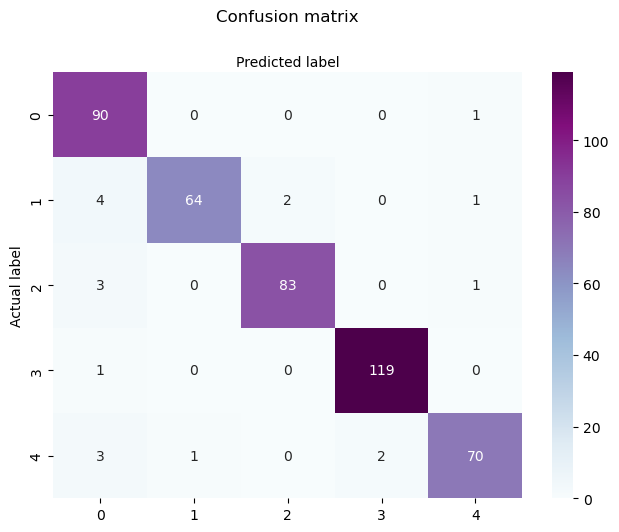

In [51]:
# Confusion Matrix
cm = confusion_matrix(label_test,predictions2)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# for Naive Bayes

In [68]:
from sklearn.naive_bayes import MultinomialNB
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()) #train on TF-IDF vectors w/
])

In [70]:
pipeline3.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000022E5C370550>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [71]:
predictions3 = pipeline3.predict(msg_test)
print(predictions3)

['sport' 'business' 'sport' 'politics' 'politics' 'business' 'sport'
 'sport' 'politics' 'tech' 'business' 'tech' 'sport' 'politics' 'business'
 'tech' 'entertainment' 'politics' 'politics' 'politics' 'sport' 'sport'
 'business' 'tech' 'business' 'politics' 'politics' 'entertainment'
 'business' 'politics' 'politics' 'politics' 'tech' 'tech' 'sport' 'sport'
 'politics' 'sport' 'sport' 'sport' 'politics' 'politics' 'business'
 'business' 'sport' 'politics' 'politics' 'entertainment' 'business'
 'business' 'tech' 'tech' 'business' 'tech' 'sport' 'tech' 'tech' 'sport'
 'entertainment' 'business' 'sport' 'sport' 'tech' 'sport' 'politics'
 'business' 'entertainment' 'sport' 'politics' 'tech' 'sport'
 'entertainment' 'business' 'entertainment' 'sport' 'tech' 'sport'
 'politics' 'politics' 'politics' 'tech' 'politics' 'sport' 'politics'
 'tech' 'politics' 'sport' 'sport' 'sport' 'politics' 'politics'
 'entertainment' 'entertainment' 'entertainment' 'sport' 'tech' 'politics'
 'entertainment' '

In [72]:
print("Accuracy:",metrics.accuracy_score(predictions3,label_test))

Accuracy: 0.9730337078651685


In [73]:
#Classification Report 
print(classification_report(predictions3, label_test))

               precision    recall  f1-score   support

     business       0.99      0.95      0.97        95
entertainment       0.93      0.99      0.96        67
     politics       0.97      0.98      0.97        86
        sport       1.00      0.99      1.00       121
         tech       0.96      0.96      0.96        76

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



Text(0.5, 427.9555555555555, 'Predicted label')

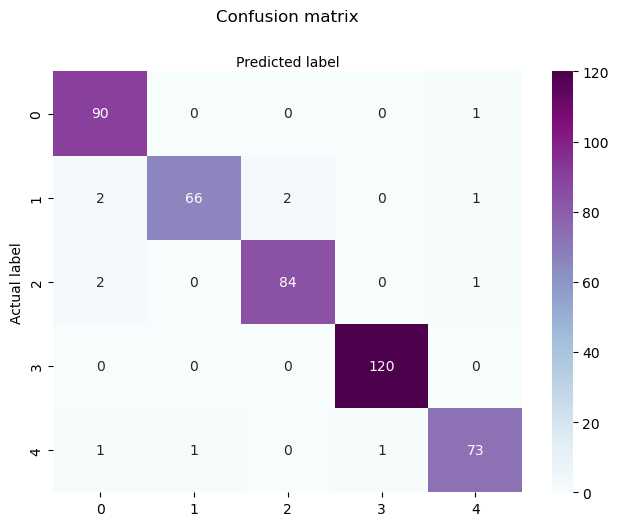

In [74]:
# Confusion Matrix
cm = confusion_matrix(label_test,predictions3)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
set(df['category'])

{'business', 'entertainment', 'politics', 'sport', 'tech'}